In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_loan_default.csv')

## VISUALIZING DATA

#### Income Distribution

This histogram shows the distribution of applicant income to understand typical ranges and check for outliers.

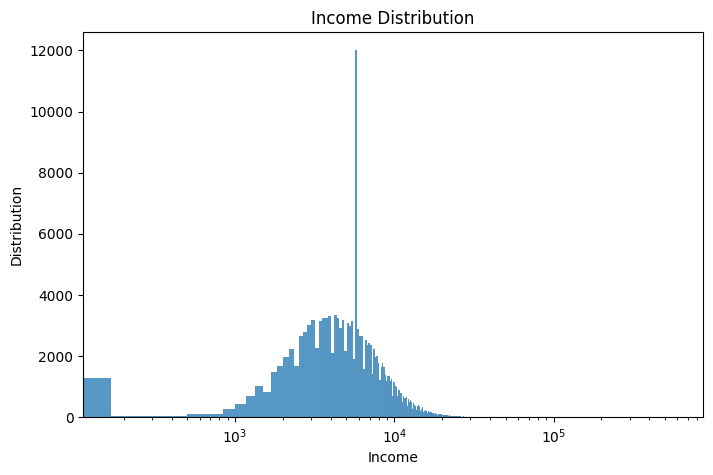

In [3]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, x='income')
plt.xscale('log')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Distribution')

plt.show()

#### Loan Amount Distribution

This histogram shows how loan amounts are distributed among applicants.

The loan amount distribution is highly right skewed. While most loans fall between 150k and 500k, there are a few extremely large loans (up to 3.5 million), which distort the histogram. To visualize the data properly I applied log-scaling.

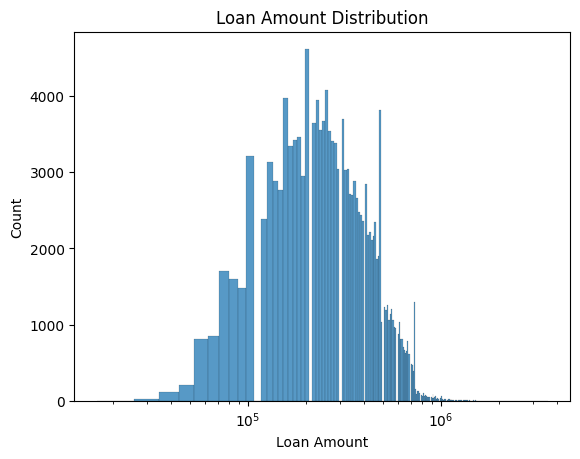

In [4]:

sns.histplot(data=df, x='loan_amount')
plt.xscale('log')

plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.show()

#### Income vs. Status BoxPlot

this boxplot shows how income differs between defaulters and non defaulters.

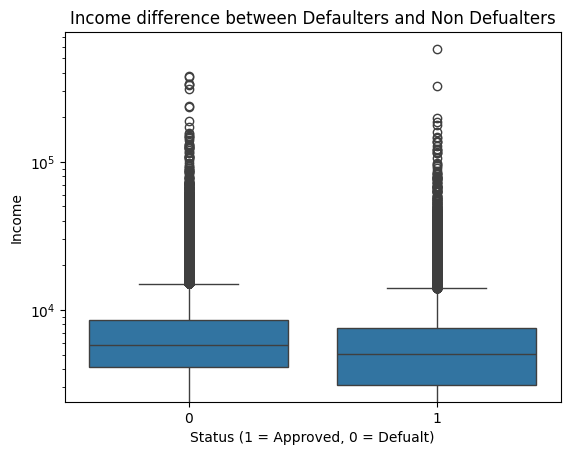

In [5]:
sns.boxplot(data=df, x = 'Status', y = 'income')
plt.yscale('log')

plt.title('Income difference between Defaulters and Non Defualters')
plt.xlabel('Status (1 = Approved, 0 = Defualt)')
plt.ylabel('Income')

plt.show()

#### Correlation between Numeric Features


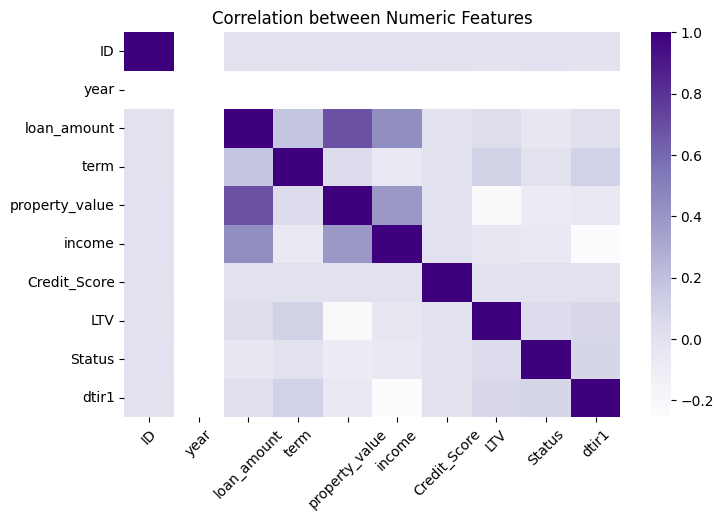

In [6]:
plt.figure(figsize=(8, 5))

sns.heatmap(df.select_dtypes(include='number').corr(), annot=False, cmap='Purples')

plt.title('Correlation between Numeric Features')
plt.xticks(rotation=45)
plt.show()

#### Default Rate Distribution

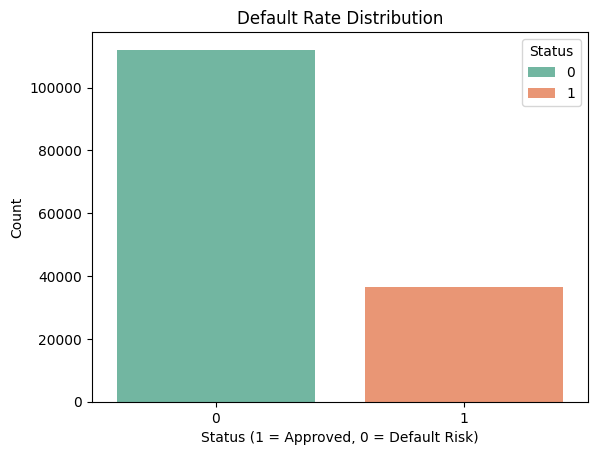

In [7]:
sns.countplot(data=df, x='Status', hue='Status', palette='Set2')
plt.title('Default Rate Distribution')
plt.xlabel('Status (1 = Approved, 0 = Default Risk)')
plt.ylabel('Count')

plt.show()

#### LTV Distribution

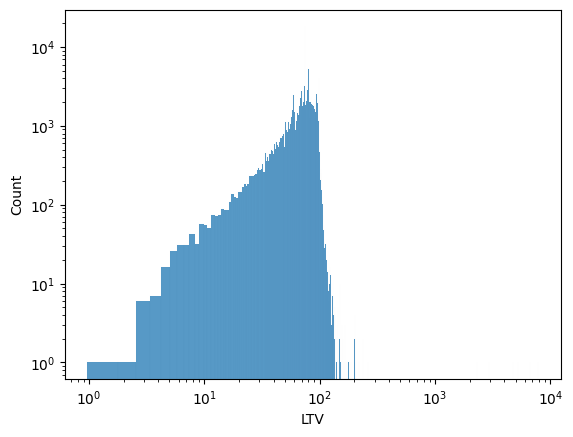

In [8]:
sns.histplot(data=df, x='LTV')
plt.xscale('log')
plt.yscale('log')

plt.show()

#### Applicant Age vs. Status

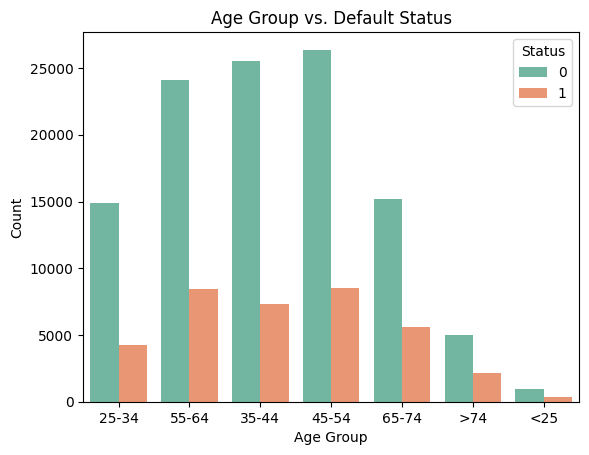

In [9]:
sns.countplot(data=df, x='age', hue='Status', palette='Set2')

plt.title('Age Group vs. Default Status')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

#### Region vs. Default Status

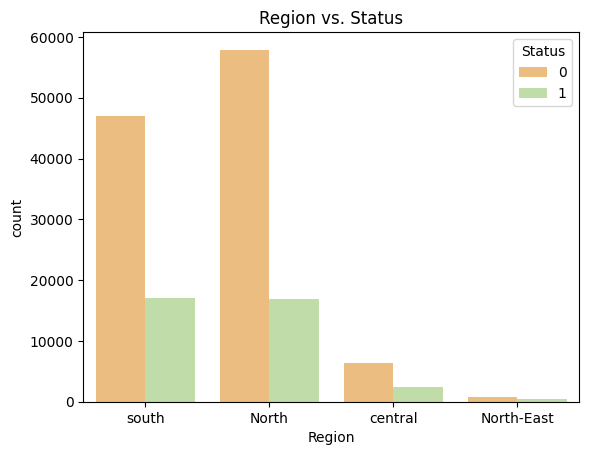

In [10]:
sns.countplot(data=df, x='Region', hue='Status', palette='Spectral')

plt.title('Region vs. Status')
plt.xlabel('Region')

plt.show()

#### PairPlot

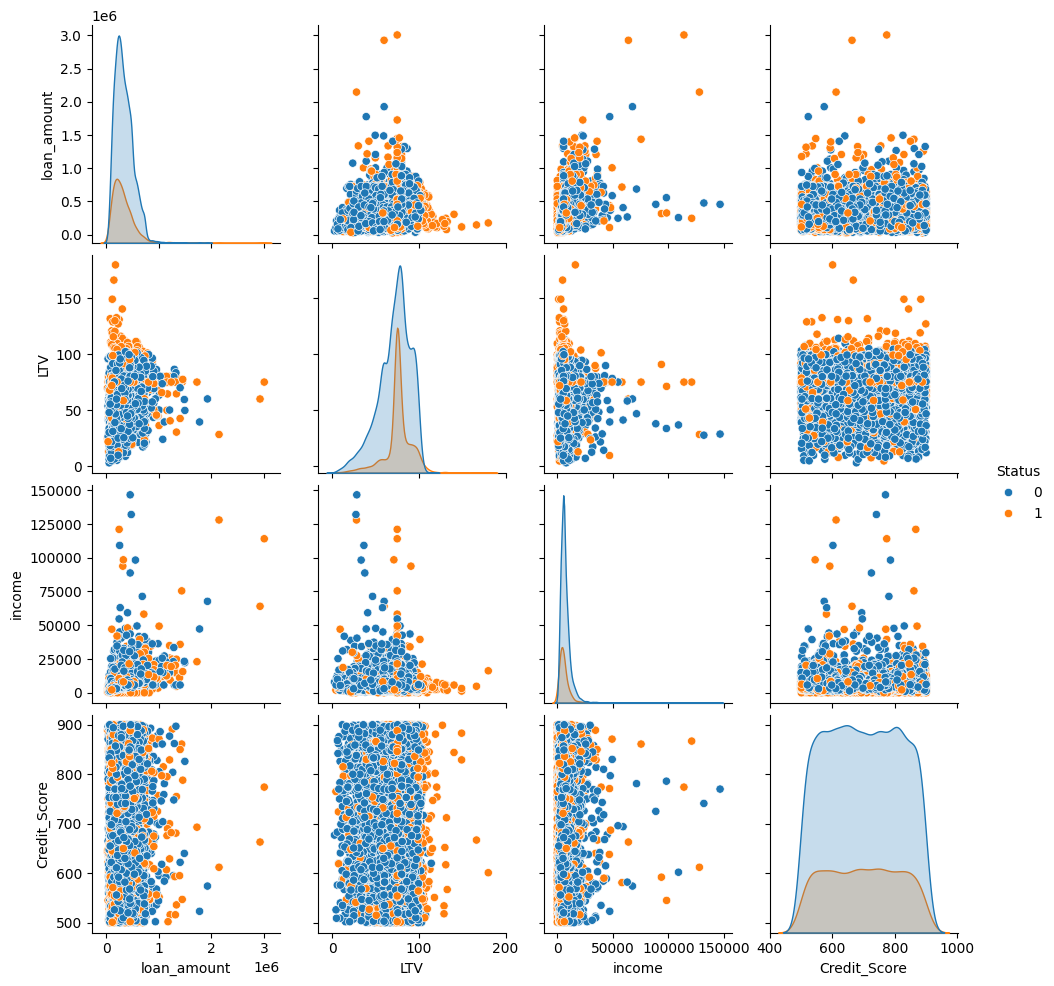

In [11]:
sample = df.sample(10000, random_state=42)

sns.pairplot(sample[['loan_amount', 'LTV', 'income', 'Credit_Score', 'Status']], hue='Status')

plt.show()

#### Correlation Bar Plot (Top features vs Target)

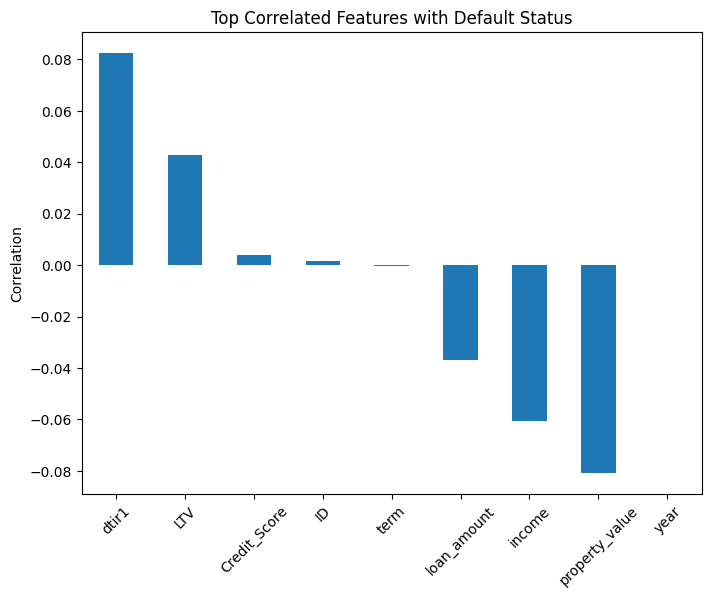

In [12]:
corr = df.select_dtypes('number').corr()['Status'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr[1:11].plot(kind='bar')  # skip Status itself
plt.title("Top Correlated Features with Default Status")
plt.ylabel("Correlation")
plt.xticks(rotation = 45)
plt.show()